In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
path_normal = './Data/ignition_rows.csv'
ignition_df = pd.read_csv(path_normal)  
ignition_df.columns

Index(['date', 'lon', 'lat', 'u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4', 'month', 'day', 'hour', 'ignition'],
      dtype='object')

In [9]:
BBox = ((ignition_df.lon.min(), ignition_df.lon.max(),
         ignition_df.lat.min(), ignition_df.lat.max()))

In [10]:
print('These are the Boundaries of our Plot', BBox)
# now extract from openstreetmap the png of the background and create an image 
map_1 = plt.imread('./Data/BC_map_ignition.png')  # Background map to generate a pretty picture

These are the Boundaries of our Plot (-122.0, -116.0, 49.0, 52.0)


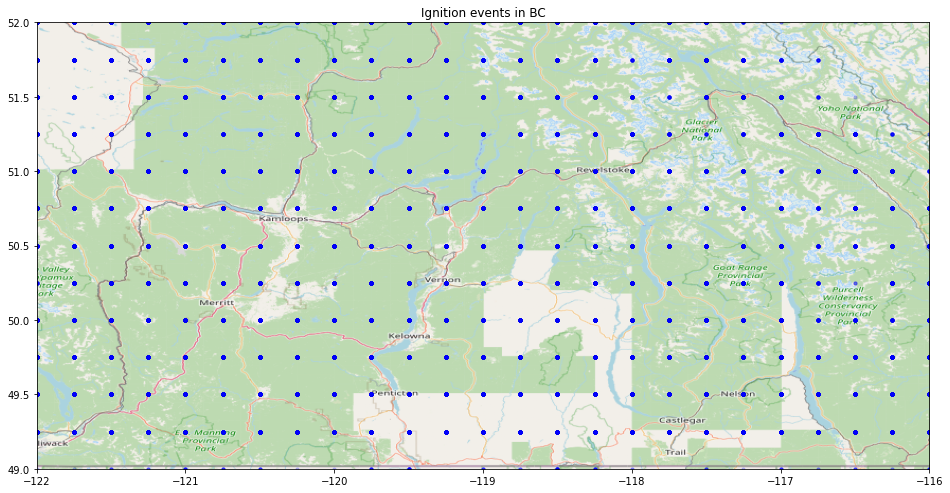

In [11]:
# map figure
fig, ax = plt.subplots(figsize=(16,14))
ax.scatter(ignition_df.lon, ignition_df.lat, zorder=1, alpha=0.2, c='b', s=10)
ax.set_title('Ignition events in BC')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_1, zorder=0, extent =BBox, aspect='equal')